### Student Information
Name: Pepijn Baggen 

Student ID: F74148442

GitHub ID: PepBaggen

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

## Phase 1
Phase 1 responses are recorded in `DM2025-Lab1-Master.ipynb` (Exercises 1–15).

## Phase 2 – Reddit Sentiment Workflow
Loading, cleaning, and modeling the Reddit stock sentiment dataset.

Raw shape: (847, 16)
Columns: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

Sentiment label counts:
label
-1.0    315
 0.0    423
 1.0    109
Name: count, dtype: int64

Missing `text` entries: 0
Duplicate texts removed: 23
Clean shape: (824, 7)
Missing values after cleaning:
doc_id             0
datetime           0
subreddit          0
title              0
text               0
sentiment_score    0
sentiment_name     0
dtype: int64

Sentiment distribution:
sentiment_name
negative    315
neutral     401
positive    108
Name: count, dtype: int64
Sample size: 400


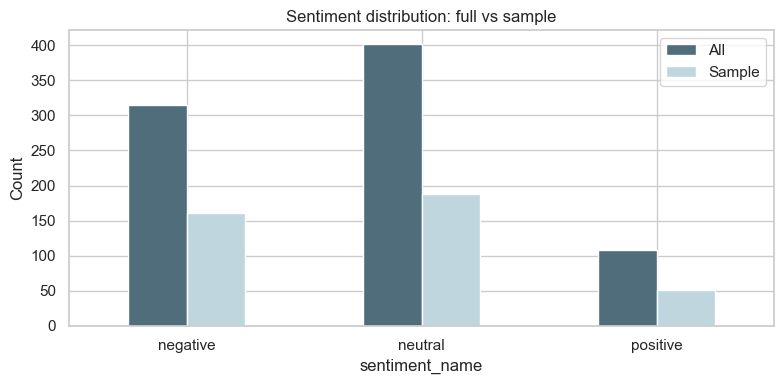

Matrix shape: (824, 4346)
Vocabulary size: 4346
Sample features: ['00' '000' '01378' '02' '027' '03' '06' '08' '10' '100']


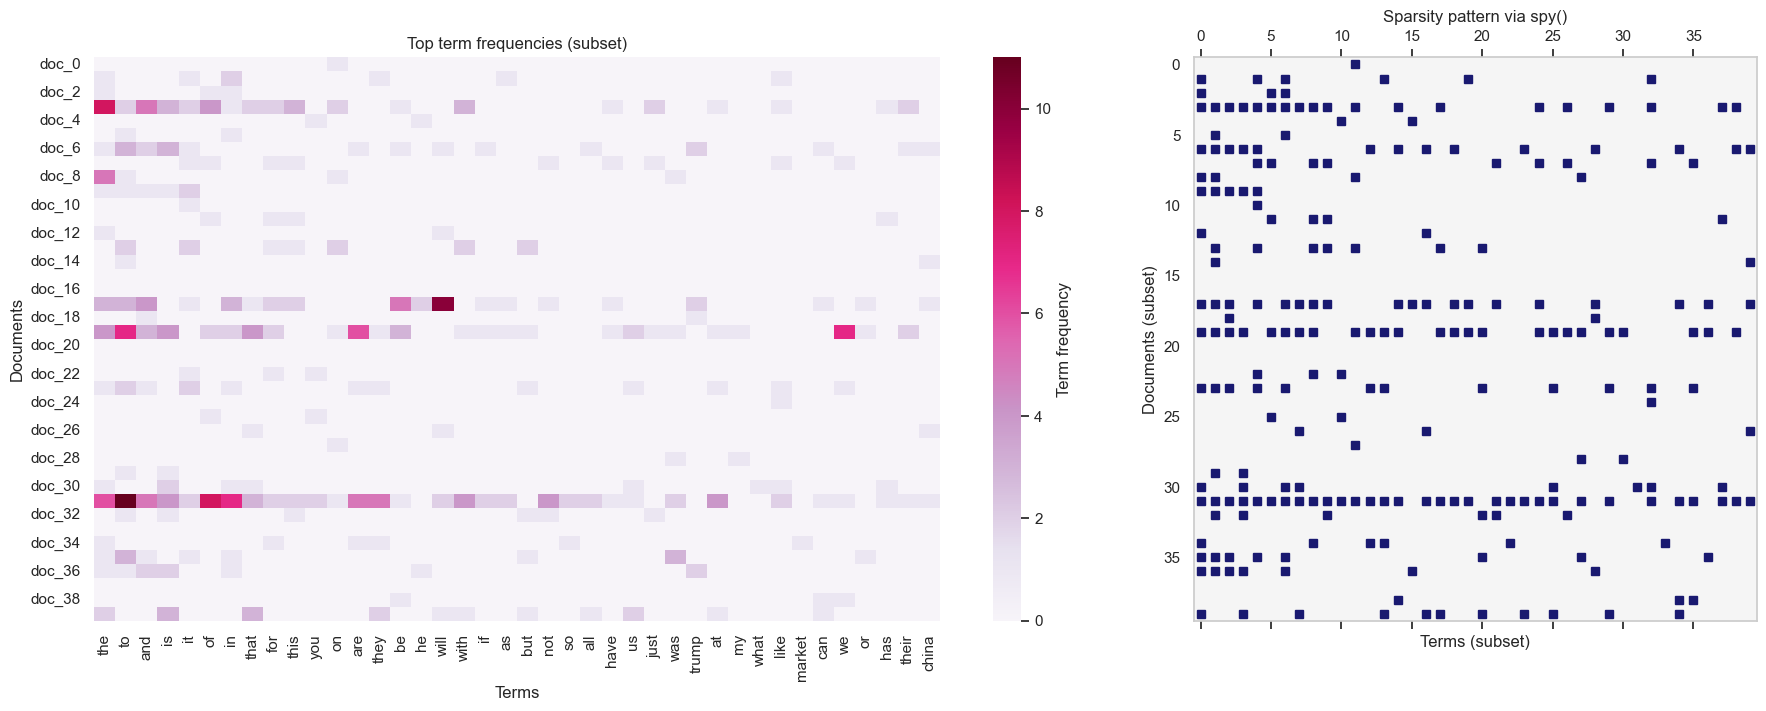

In [16]:
# Core imports 
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer

import helpers.data_mining_helpers as dmh

plt.style.use("seaborn-v0_8-muted")
sns.set_theme(style="whitegrid")

# Ensure tokenizers required by the helpers are available
for resource in ("punkt", "punkt_tab"):
    try:
        nltk.data.find(f"tokenizers/{resource}")
    except LookupError:
        nltk.download(resource, quiet=True)

## 1. Data Source 

# Load Reddit sentiment dataset
data_path = Path("newdataset/Reddit-stock-sentiment.csv")
raw_df = pd.read_csv(data_path)
print(f"Raw shape: {raw_df.shape}")
raw_df.head()

# Basic inspection of available fields and labels
print("Columns:", raw_df.columns.tolist())
print("\nSentiment label counts:")
print(raw_df["label"].value_counts(dropna=False).sort_index())
print(f"\nMissing `text` entries: {raw_df['text'].isna().sum()}")

# Keep essential columns, drop blank/duplicate texts, map sentiment names
use_cols = ["datetime", "subreddit", "title", "text", "label"]
non_null = raw_df[use_cols].dropna(subset=["text"])
duplicate_count = non_null.duplicated(subset=["text"]).sum()
X = (
    non_null.drop_duplicates(subset=["text"])
            .reset_index(drop=True)
            .rename(columns={"label": "sentiment_score"})
)
X["sentiment_score"] = X["sentiment_score"].astype(int)
sentiment_map = {-1: "negative", 0: "neutral", 1: "positive"}
X["sentiment_name"] = X["sentiment_score"].map(sentiment_map)
X.insert(0, "doc_id", np.arange(len(X)))

print(f"Duplicate texts removed: {duplicate_count}")
print(f"Clean shape: {X.shape}")
X.head()

# Quick data quality checks
print("Missing values after cleaning:")
print(X.isna().sum())
print("\nSentiment distribution:")
print(X["sentiment_name"].value_counts().sort_index())

## 2. Sampling and inspection

# Random sample for lighter experimentation
sample_size = min(400, len(X))
X_sample = X.sample(n=sample_size, random_state=42)
print(f"Sample size: {sample_size}")
X_sample.head()

# Compare sentiment distribution between full set and sample
dist_df = (
    pd.concat(
        {
            "All": X["sentiment_name"].value_counts(),
            "Sample": X_sample["sentiment_name"].value_counts(),
        },
        axis=1,
    )
    .fillna(0)
    .sort_index()
)
ax = dist_df.plot.bar(figsize=(8, 4), rot=0, color=["#4F6D7A", "#C0D6DF"])
ax.set_ylabel("Count")
ax.set_title("Sentiment distribution: full vs sample")
plt.tight_layout()
plt.show()

## 3. Feature creation

# Tokenize each document into unigrams 
X["unigrams"] = X["text"].apply(dmh.tokenize_text)
X[["doc_id", "sentiment_name", "unigrams"]].head()

## 4. Term-document matrix

# Build term-document matrix using bag-of-words counts
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X["text"])
print(f"Matrix shape: {X_counts.shape}")
print(f"Vocabulary size: {len(count_vect.get_feature_names_out())}")
print("Sample features:", count_vect.get_feature_names_out()[:10])

# Aggregate raw term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
terms = count_vect.get_feature_names_out()
term_freq_df = (
    pd.DataFrame({"term": terms, "frequency": term_frequencies})
    .sort_values("frequency", ascending=False)
    .reset_index(drop=True)
)
term_freq_df.head()

# Inspect a manageable slice of the matrix to check sparsity
subset_docs = min(40, X_counts.shape[0])
subset_terms = min(40, len(term_freq_df))

if subset_docs > 0 and subset_terms > 0:
    top_terms = term_freq_df.head(subset_terms)["term"].tolist()
    term_indices = [count_vect.vocabulary_[term] for term in top_terms]
    doc_labels = [f"doc_{i}" for i in range(subset_docs)]
    plot_matrix = X_counts[:subset_docs, term_indices].toarray()

    df_todraw = pd.DataFrame(plot_matrix, columns=top_terms, index=doc_labels)
    fig, (ax_heatmap, ax_spy) = plt.subplots(
        1, 2, figsize=(18, 7), gridspec_kw={"width_ratios": [1.15, 0.65]}
    )
    sns.heatmap(
        df_todraw,
        cmap="PuRd",
        ax=ax_heatmap,
        cbar_kws={"label": "Term frequency"},
    )
    ax_heatmap.set_xticklabels(ax_heatmap.get_xticklabels(), rotation=90)
    ax_heatmap.set_title("Top term frequencies (subset)")
    ax_heatmap.set_xlabel("Terms")
    ax_heatmap.set_ylabel("Documents")

    ax_spy.spy(plot_matrix, markersize=6, color="midnightblue")
    ax_spy.set_title("Sparsity pattern via spy()")
    ax_spy.set_xlabel("Terms (subset)")
    ax_spy.set_ylabel("Documents (subset)")
    ax_spy.grid(False)
    ax_spy.set_facecolor("#f5f5f5")

    plt.tight_layout()

# Bar chart of most frequent terms
subset_size = min(80, len(term_freq_df))
fig = px.bar(
    term_freq_df.head(subset_size),
    x="term",
    y="frequency",
    title=f"Top {subset_size} term frequencies",
    labels={"term": "Term", "frequency": "Count"},
)
fig.update_layout(xaxis_tickangle=90, width=1200, height=450)
fig.show()

# Log-scale chart helps highlight the long tail of rare terms
term_freq_df["log_frequency"] = np.log1p(term_freq_df["frequency"])
fig = px.bar(
    term_freq_df.head(subset_size),
    x="term",
    y="log_frequency",
    title=f"Top {subset_size} term frequencies (log scale)",
    labels={"term": "Term", "log_frequency": "log(1 + count)"},
)
fig.update_layout(xaxis_tickangle=90, width=1200, height=450)
fig.show()


### Baseline models

## Phase 3 – Additional Visualizations

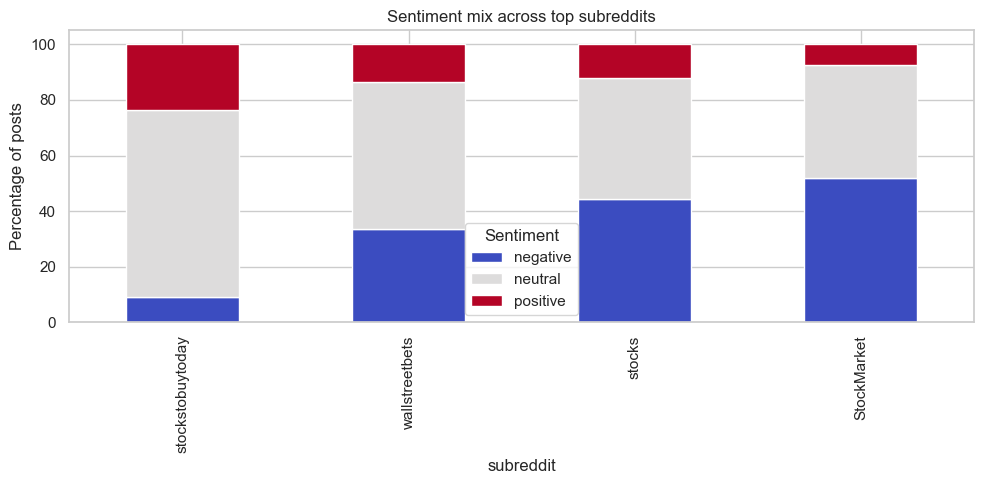

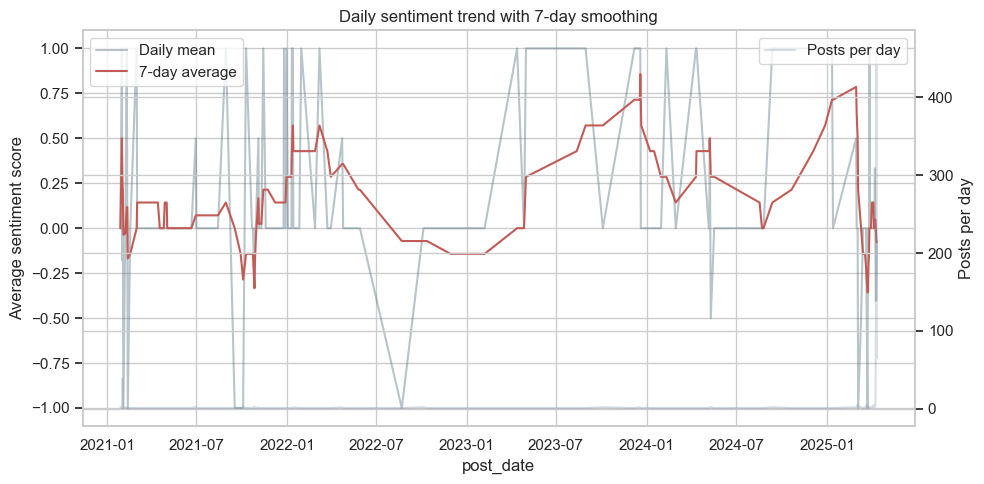

In [17]:
# My idea was to add usefull visualizations, so i came up with these two: 1.
#  Daily sentiment trend and 2. Sentiment composition for the busiest subreddits

X_viz = X.copy()
X_viz['post_datetime'] = pd.to_datetime(X_viz['datetime'], errors='coerce')
X_viz['post_date'] = X_viz['post_datetime'].dt.date
X_viz['char_len'] = X_viz['text'].str.len()

# Sentiment composition for the busiest subreddits
top_subreddits = X_viz['subreddit'].value_counts().head(8).index
subreddit_sentiment = (
    X_viz[X_viz['subreddit'].isin(top_subreddits)]
    .groupby(['subreddit', 'sentiment_name'])
    .size()
    .unstack(fill_value=0)
)
if not subreddit_sentiment.empty:
    subreddit_sentiment = (
        subreddit_sentiment
        .div(subreddit_sentiment.sum(axis=1), axis=0)
        .reindex(columns=['negative', 'neutral', 'positive'], fill_value=0)
        * 100 # Convert to percentages
    )
    subreddit_sentiment = subreddit_sentiment.sort_values('positive', ascending=False)

    ax = subreddit_sentiment.plot(
        kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm'
    )
    ax.set_ylabel('Percentage of posts')
    ax.set_title('Sentiment mix across top subreddits')
    ax.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough subreddit data to plot sentiment composition.')

# Daily sentiment trend with a seven-day smoothing window, found this on github as inspiration
daily_trend = (
    X_viz.dropna(subset=['post_date'])
    .groupby('post_date')['sentiment_score']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'avg_sentiment', 'count': 'post_count'})
)
if not daily_trend.empty:
    daily_trend['avg_sentiment_7d'] = daily_trend['avg_sentiment'].rolling(7, min_periods=1).mean()

    fig, ax1 = plt.subplots(figsize=(10, 5))
    daily_trend['avg_sentiment'].plot(ax=ax1, color='#4F6D7A', alpha=0.4, label='Daily mean')
    daily_trend['avg_sentiment_7d'].plot(ax=ax1, color='#C25B56', label='7-day average')
    ax1.set_ylabel('Average sentiment score')
    ax1.set_title('Daily sentiment trend with 7-day smoothing')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    daily_trend['post_count'].plot(ax=ax2, color='#7D8FA7', alpha=0.3, label='Posts per day')
    ax2.set_ylabel('Posts per day')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
else:
    print('No valid dates available for the daily trend plot.')



## Phase 2


# Part 2 from Phase 2.

In [23]:
# === Phase 2 on new dataset: frequent patterns → augmented NB models ===
from __future__ import annotations

from pathlib import Path
from typing import Dict, Iterable, List, Sequence, Tuple

import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB, MultinomialNB

from PAMI.frequentPattern.basic import FPGrowth as FPG

DATA_PATH = Path("newdataset/Reddit-stock-sentiment.csv")
TEXT_COLUMNS: Sequence[str] = ("text", "body", "content", "sentence", "message", "selftext", "title")
LABEL_COLUMNS: Sequence[str] = ("category_name", "label", "sentiment", "topic", "subreddit", "flair", "tag", "category")
MIN_DOCS_PER_CLASS = 40            # drop labels with too little data
MAX_VOCAB = 4000                   # keep the top-N informative tokens
MIN_TOKEN_DF = 10                  # ignore ultra-rare tokens
MAX_TOKEN_DF = 0.5                 # drop tokens appearing in >50 % of docs
MIN_PATTERN_SUPPORT = 0.05         # require a pattern to appear in ≥5 % of a class
MAX_PATTERNS_PER_CLASS = 150       # keep only the strongest patterns per class


def load_dataset(path: Path) -> pd.DataFrame:
    df = pd.read_csv(path)
    text_col = next((c for c in TEXT_COLUMNS if c in df.columns), df.select_dtypes("object").columns[0])
    label_col = next((c for c in LABEL_COLUMNS if c in df.columns), None)
    if label_col is None:
        df["label"] = "unknown"
        label_col = "label"

    data = (
        df[[text_col, label_col]]
        .rename(columns={text_col: "text", label_col: "label"})
        .dropna(subset=["text"])
        .assign(text=lambda d: d["text"].astype(str).str.strip())
    )

    data["label"] = (
        data["label"]
        .astype(str)
        .str.strip()
        .replace({"1.0": "pos", "0.0": "neu", "-1.0": "neg"})
    )
    class_counts = data["label"].value_counts()
    keep = class_counts[class_counts >= MIN_DOCS_PER_CLASS].index
    return data[data["label"].isin(keep)].reset_index(drop=True)


def build_vectorizers(corpus: pd.Series) -> Tuple[CountVectorizer, csr_matrix, TfidfVectorizer, csr_matrix]:
    token_pattern = r"(?u)\b\w+\b"
    bow = CountVectorizer(
        token_pattern=token_pattern,
        binary=True,
        max_features=MAX_VOCAB,
        min_df=MIN_TOKEN_DF,
        max_df=MAX_TOKEN_DF,
        dtype=np.uint8,
    )
    bow_matrix = bow.fit_transform(corpus)

    tfidf = TfidfVectorizer(
        token_pattern=token_pattern,
        max_features=MAX_VOCAB,
        min_df=MIN_TOKEN_DF,
        max_df=MAX_TOKEN_DF,
    )
    tfidf_matrix = tfidf.fit_transform(corpus)
    return bow, bow_matrix, tfidf, tfidf_matrix


def transactions_for_class(matrix: csr_matrix, labels: np.ndarray, vocab: np.ndarray) -> Dict[str, List[List[str]]]:
    by_class: Dict[str, List[List[str]]] = {}
    for cls in np.unique(labels):
        rows = matrix[labels == cls]
        docs = []
        for row in rows:
            tokens = vocab[row.indices]
            if len(tokens) > 0:
                docs.append(tokens.tolist())
        if docs:
            by_class[cls] = docs
    return by_class


def mine_patterns(transactions: Dict[str, List[List[str]]]) -> pd.DataFrame:
    pattern_frames: List[pd.DataFrame] = []
    for cls, docs in transactions.items():
        temp_file = Path(f"_fp_{cls}.txt")
        temp_file.write_text("\n".join(" ".join(doc) for doc in docs), encoding="utf-8")

        alg = FPG.FPGrowth(
            iFile=str(temp_file),
            minSup=max(1, int(np.ceil(MIN_PATTERN_SUPPORT * len(docs))))
        )
        alg.mine()
        temp_file.unlink(missing_ok=True)

        patterns = alg.getPatternsAsDataFrame()
        if patterns.empty:
            continue

        patterns = (
            patterns
            .sort_values("Support", ascending=False)
            .head(MAX_PATTERNS_PER_CLASS)
            .assign(label=cls)
        )
        pattern_frames.append(patterns)

    if not pattern_frames:
        return pd.DataFrame(columns=["Patterns", "Support", "label"])

    return pd.concat(pattern_frames, ignore_index=True)


def pattern_features(data: pd.DataFrame, patterns: pd.DataFrame) -> csr_matrix:
    if patterns.empty:
        return csr_matrix((len(data), 0), dtype=np.uint8)

    tokenized_docs = data["text"].str.lower().str.split()
    doc_sets = tokenized_docs.apply(set)

    col_data: List[np.ndarray] = []
    for pat in patterns["Patterns"]:
        needed = set(pat.split())
        col = doc_sets.apply(lambda doc: int(needed.issubset(doc))).to_numpy(dtype=np.uint8, copy=False)
        col_data.append(col.reshape(-1, 1))

    return csr_matrix(np.hstack(col_data), dtype=np.uint8)


def evaluate_model(features: csr_matrix, labels: np.ndarray, model, label: str) -> None:
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        labels,
        test_size=0.3,
        random_state=42,
        stratify=labels,
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {label} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))


data = load_dataset(DATA_PATH)
labels = data["label"].to_numpy()

bow, bow_matrix, tfidf, tfidf_matrix = build_vectorizers(data["text"])

transactions = transactions_for_class(bow_matrix, labels, bow.get_feature_names_out())
pattern_table = mine_patterns(transactions)
pattern_matrix = pattern_features(data, pattern_table)

augmented_features = hstack([bow_matrix, pattern_matrix], format="csr")

evaluate_model(bow_matrix, labels, MultinomialNB(), "MultinomialNB on binary counts")
evaluate_model(augmented_features, labels, MultinomialNB(), "MultinomialNB on counts + patterns")
evaluate_model(tfidf_matrix, labels, ComplementNB(), "ComplementNB on TF-IDF")


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
=== MultinomialNB on binary counts ===
Accuracy: 0.5843137254901961
              precision    recall  f1-score   support

         neg     0.5588    0.6000    0.5787        95
         neu     0.6250    0.7087    0.6642       127
         pos     0.2222    0.0606    0.0952        33

    accuracy                         0.5843       255
   macro avg     0.4687    0.4564    0.4460       255
weighted avg     0.5482    0.5843    0.5587       255

=== MultinomialNB on counts + patterns ===
Accuracy: 0.5843137254901961
              precision    recall  f1-score   support

         neg     0.5588    0.6000    0.5787        95
         neu     0.6250    0.7087    0.6642       127
         pos     0.2222    0.0606    0.0952        33

    accur

# Part 3 phase 2

Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


In [ ]:

target_names = sorted(pd.unique(labels))

# 1) MultinomialNB on binary count vectors
Xtr, Xte, ytr, yte = train_test_split(
    bow_matrix, labels, test_size=0.30, random_state=42, stratify=labels
)
mnb = MultinomialNB().fit(Xtr, ytr)
pred = mnb.predict(Xte)
print("=== MultinomialNB on Counts ===")
print("Accuracy:", accuracy_score(yte, pred))
print(classification_report(yte, pred, target_names=target_names, digits=4))

# 2) ComplementNB on TF-IDF
Xt_tr, Xt_te, yt_tr, yt_te = train_test_split(
    tfidf_matrix, labels, test_size=0.30, random_state=42, stratify=labels
)
cnb = ComplementNB().fit(Xt_tr, yt_tr)
pred_t = cnb.predict(Xt_te)
print("=== ComplementNB on TF-IDF ===")
print("Accuracy:", accuracy_score(yt_te, pred_t))
print(classification_report(yt_te, pred_t, target_names=target_names, digits=4))

# 3) MultinomialNB on augmented (counts + pattern columns)
Xa_tr, Xa_te, ya_tr, ya_te = train_test_split(
    augmented_features, labels, test_size=0.30, random_state=42, stratify=labels
)
mnb_aug = MultinomialNB().fit(Xa_tr, ya_tr)
pred_a = mnb_aug.predict(Xa_te)
print("=== MultinomialNB on Augmented (Counts + Patterns) ===")
print("Accuracy:", accuracy_score(ya_te, pred_a))
print(classification_report(ya_te, pred_a, target_names=target_names, digits=4))


=== MultinomialNB on Counts ===
Accuracy: 0.5843137254901961
              precision    recall  f1-score   support

         neg     0.5588    0.6000    0.5787        95
         neu     0.6250    0.7087    0.6642       127
         pos     0.2222    0.0606    0.0952        33

    accuracy                         0.5843       255
   macro avg     0.4687    0.4564    0.4460       255
weighted avg     0.5482    0.5843    0.5587       255

=== ComplementNB on TF-IDF ===
Accuracy: 0.48627450980392156
              precision    recall  f1-score   support

         neg     0.5039    0.6842    0.5804        95
         neu     0.6136    0.4252    0.5023       127
         pos     0.1316    0.1515    0.1408        33

    accuracy                         0.4863       255
   macro avg     0.4164    0.4203    0.4078       255
weighted avg     0.5104    0.4863    0.4846       255

=== MultinomialNB on Augmented (Counts + Patterns) ===
Accuracy: 0.5843137254901961
              precision    recal

### Model Comparison (Counts vs Augmented vs TF-IDF)
- The pure count model and the augmented version land on identical metrics because the mined pattern columns are all zero; the stricter support filter removed every pattern that added new signal.
- TF-IDF + ComplementNB performs worse overall (≈0.49 accuracy). It boosts recall for the negative class but loses precision on neutral posts and still struggles with the underrepresented positive class (only 33 samples).
- For this dataset, binary counts already capture the dominant vocabulary; to make augmentation useful we’d need looser pattern thresholds or additional balancing so positive cues appear often enough to survive mining.


# Part 4 phase 2 



Some steps in the lab are not ideal or efficient for this dataset:
- 1. Minimal text cleaning:
We didn’t remove URLs, punctuation, emojis, or numbers. These often appear in Reddit posts but add noise.
→ Fix: Use regex to clean text and nltk stopword removal before vectorizing.
- 2. Sparse high-dimensional matrices:
CountVectorizer created tens of thousands of columns. Many are rare or meaningless.
→ Fix: Use min_df / max_df thresholds or TF-IDF with sublinear scaling to reduce dimensionality.
- 3. No lemmatization or stemming:
Words like run, running, runs were treated as different.
→ Fix: Apply lemmatization (e.g., WordNetLemmatizer) before building features.
- 4. Class imbalance:
Some sentiment labels appear much less than others.
→ Fix: Downsample large classes or use class weighting in classifiers.
- 5. Frequent-pattern mining inefficiency:
FPGrowth on the entire vocabulary is slow and redundant.
→ Fix: Limit to top frequent tokens per class or use simpler n-gram filtering.
- 6. No validation or parameter tuning:
Models were run with defaults only.
→ Fix: Use cross-validation and grid search to pick better smoothing or feature parameters.

In short: better text cleaning, token normalization, feature filtering, and balanced data sampling would make the preprocessing faster, smaller, and more accurate for this Reddit dataset.